In [302]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



## Read Dataset

In [462]:
file_name = 'Week1_challenge_data_source.csv'
telecom_dataset = pd.read_csv(f'../data/{file_name}', na_values=['?', None, 'nan','undefined'])

In [463]:
pd.set_option('max_column', None)
telecom_dataset.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


### How many data points we have 

In [464]:
print(f" There are {telecom_dataset.shape[0]} rows and {telecom_dataset.shape[1]} columns")

 There are 150001 rows and 55 columns


In [465]:
# column names
telecom_dataset.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


## Handling Missing Values

In [466]:
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Diabetes dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(telecom_dataset)

The Diabetes dataset contains 12.72 % missing values.


### How many null values we have on each columns

In [467]:
telecom_dataset.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [468]:
telecom_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

### Remove rows with emtpy Bearer Id, and MSISDN/Number

In [469]:
telecom_dataset.dropna(subset = ["Bearer Id", "MSISDN/Number"], inplace=True)

In [436]:
# check the new null values
telecom_dataset.isnull().sum()

Bearer Id                                        0
Start                                            0
Start ms                                         0
End                                              0
End ms                                           0
Dur. (ms)                                        0
IMSI                                             0
MSISDN/Number                                    0
IMEI                                             0
Last Location Name                             160
Avg RTT DL (ms)                              27636
Avg RTT UL (ms)                              27616
Avg Bearer TP DL (kbps)                          0
Avg Bearer TP UL (kbps)                          0
TCP DL Retrans. Vol (Bytes)                  87764
TCP UL Retrans. Vol (Bytes)                  96128
DL TP < 50 Kbps (%)                            712
50 Kbps < DL TP < 250 Kbps (%)                 712
250 Kbps < DL TP < 1 Mbps (%)                  712
DL TP > 1 Mbps (%)             

In [470]:
columns = telecom_dataset.columns

def get_columns_with_higher_null(df):
    data_set_length = df.shape[0]
    result = []
    
    for column in columns:
        nulls = data_set_length - df[column].count()
        
        percentage = round((nulls / data_set_length) * 100)
        
        if(percentage > 30):
            result.append(column)
    return result
        
        
bad_columns = get_columns_with_higher_null(telecom_dataset)
print(bad_columns)

telecom_dataset.drop(bad_columns, axis=1, inplace=True)
print(telecom_dataset.shape)
print(telecom_dataset.isna().sum())

['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B']
(148506, 45)
Bearer Id                             0
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                         0
IMEI                                  0
Last Location Name                  160
Avg RTT DL (ms)                   27636
Avg RTT UL (ms)                   27616
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 712
50 Kbps < DL TP < 250 Kbps (%)      712
250 Kbps

In [474]:
# More column Clean up

def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]

non_essential_columns = ['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
                        '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
                        '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'Nb of sec with Vol DL < 6250B',
                        'Nb of sec with Vol UL < 1250B']

for column in non_essential_columns:
    telecom_dataset[column] = fix_missing_ffill(telecom_dataset, column)

telecom_dataset['Handset Manufacturer'] = fix_missing_ffill(telecom_dataset, 'Handset Manufacturer')
telecom_dataset['Handset Type'] = fix_missing_ffill(telecom_dataset, 'Handset Type')
telecom_dataset['Last Location Name'] = fix_missing_ffill(telecom_dataset, 'Last Location Name')
telecom_dataset.isnull().sum()


Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

### Make change to appropriate data type

In [439]:
def convert_to_string(column):
    column = column.apply(lambda x: '{:.0f}'.format(x))
    column.astype('str')
    return column

telecom_dataset['Bearer Id'] = convert_to_string(telecom_dataset['Bearer Id'])
telecom_dataset['MSISDN/Number'] = convert_to_string(telecom_dataset['MSISDN/Number'])
telecom_dataset['IMSI'] = convert_to_string(telecom_dataset['IMSI'])
telecom_dataset['IMEI'] = convert_to_string(telecom_dataset['IMEI'])

telecom_dataset["Start"]=pd.to_datetime(telecom_dataset["Start"], format='%m/%d/%Y %H:%M', errors='coerce')
telecom_dataset["End"]=pd.to_datetime(telecom_dataset["End"], format='%m/%d/%Y %H:%M', errors='coerce')

telecom_dataset['Handset Manufacturer'] = telecom_dataset['Handset Manufacturer'].astype('str')
telecom_dataset['Last Location Name'] = telecom_dataset['Last Location Name'].astype('str')
telecom_dataset.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460845000704,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,208201448079117,33664962239,35521209507511,9164566995485190,42.0,5.0,23.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482879000576,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,208201909211140,33681854413,35794009006359,L77566A,65.0,5.0,16.0,26.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484081000448,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,208200314458056,33760627129,35281510359387,D42335A,NaN,NaN,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485443000320,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,208201402342131,33750343200,35356610164913,T21824A,NaN,NaN,44.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,1.321510e+09,nan,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480999936,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,208201401415120,33699795932,35407009745539,D88865A,NaN,NaN,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [407]:
telecom_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148506 entries, 0 to 149999
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       148506 non-null  object        
 1   Start                           148506 non-null  datetime64[ns]
 2   Start ms                        148506 non-null  float64       
 3   End                             148506 non-null  datetime64[ns]
 4   End ms                          148506 non-null  float64       
 5   Dur. (ms)                       148506 non-null  float64       
 6   IMSI                            148506 non-null  object        
 7   MSISDN/Number                   148506 non-null  object        
 8   IMEI                            148506 non-null  object        
 9   Last Location Name              148506 non-null  object        
 10  Avg RTT DL (ms)                 120870 non-null  float64

## HANDSET 

In [497]:
# top 10 manufacturers
top_10_handset = telecom_dataset[['Handset Type','IMSI']].groupby(['Handset Type'])['IMSI'].nunique().nlargest(10)
print(top_10_handset)

Handset Type
Huawei B528S-23A                11254
Apple iPhone 6S (A1688)          7318
Apple iPhone 6 (A1586)           6791
Apple iPhone 7 (A1778)           5072
Apple iPhone Se (A1723)          4076
Apple iPhone 8 (A1905)           3849
Samsung Galaxy S8 (Sm-G950F)     3553
Apple iPhone Xr (A2105)          3373
Samsung Galaxy J5 (Sm-J530)      3034
Samsung Galaxy A5 Sm-A520F       2967
Name: IMSI, dtype: int64


In [441]:
# top3 manufacturers
top_3_manufacturers = telecom_dataset[['Handset Manufacturer','IMSI']].groupby(['Handset Manufacturer'])['IMSI'].nunique().nlargest(3)
print(top_3_manufacturers)

Handset Manufacturer
Apple      42477
Samsung    30647
Huawei     21628
Name: IMSI, dtype: int64


### top 5 handsets per top 3 handset manufacturer

In [519]:
apple_phones = telecom_dataset[telecom_dataset['Handset Manufacturer']=='Apple'].groupby(['Handset Type'])['IMSI'].nunique().nlargest(5)
samsang_phones = telecom_dataset[telecom_dataset['Handset Manufacturer']=='Samsung'].groupby(['Handset Type'])['IMSI'].nunique().nlargest(5)
huawei_phones = telecom_dataset[telecom_dataset['Handset Manufacturer']=='Huawei'].groupby(['Handset Type'])['IMSI'].nunique().nlargest(5)

print("*** Apple ***")
print(apple_phones)
print()

print("*** Samsang ***")
print(samsang_phones)
print()

print("**** Huawei ****")
print(huawei_phones)

*** Apple ***
Handset Type
Apple iPhone 6S (A1688)    7318
Apple iPhone 6 (A1586)     6791
Apple iPhone 7 (A1778)     5072
Apple iPhone Se (A1723)    4076
Apple iPhone 8 (A1905)     3849
Name: IMSI, dtype: int64

*** Samsang ***
Handset Type
Samsung Galaxy S8 (Sm-G950F)    3553
Samsung Galaxy J5 (Sm-J530)     3034
Samsung Galaxy A5 Sm-A520F      2967
Samsung Galaxy J3 (Sm-J330)     2841
Samsung Galaxy S7 (Sm-G930X)    2508
Name: IMSI, dtype: int64

**** Huawei ****
Handset Type
Huawei B528S-23A                  11254
Huawei P20 Lite Huawei Nova 3E     1648
Huawei E5180                       1273
Huawei P20                         1206
Huawei Y6 2018                      822
Name: IMSI, dtype: int64


([<matplotlib.patches.Wedge at 0x1588cd550>,
 [Text(0.1778894524591704, 1.085520770277463, 'Apple'),
  Text(-0.8474817817265541, -0.701266446966904, 'Samsung'),
  Text(0.8290885125470108, -0.7229192474699961, 'Huawei')])

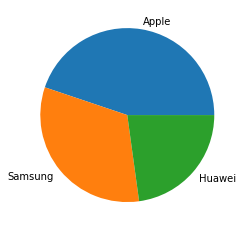

In [492]:
plt.pie(top_3_manufacturers, labels=['Apple', 'Samsung', 'Huawei'])

([<matplotlib.patches.Wedge at 0x15ffd8280>,
 [Text(0.8488147966360643, 0.6996523715472399, 'Huawei B528S-23A'),
  Text(-0.27874664216335326, 1.0640960057638857, 'Apple iPhone 6S (A1688)'),
  Text(-0.9903253029521119, 0.47880663563990844, 'Apple iPhone 6 (A1586)'),
  Text(-1.058271942242098, -0.30010081016741336, 'Apple iPhone 7 (A1778)'),
  Text(-0.7369212665290091, -0.8166682600280737, 'Apple iPhone Se (A1723)'),
  Text(-0.2707216282215534, -1.0661659345585335, 'Apple iPhone 8 (A1905)'),
  Text(0.22364952507125394, -1.0770240897655923, 'Samsung Galaxy S8 (Sm-G950F)'),
  Text(0.6471686660164967, -0.8894789023503753, 'Apple iPhone Xr (A2105)'),
  Text(0.9381584224986727, -0.5743333303011434, 'Samsung Galaxy J5 (Sm-J530)'),
  Text(1.0818829496403903, -0.1988197255742222, 'Samsung Galaxy A5 Sm-A520F')])

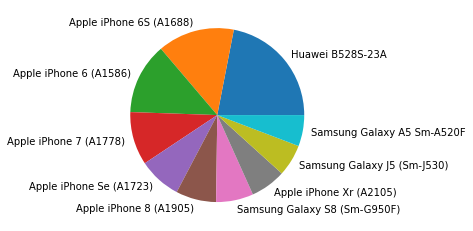

In [501]:
# Huawei B528S-23A                11254
# Apple iPhone 6S (A1688)          7318
# Apple iPhone 6 (A1586)           6791
# Apple iPhone 7 (A1778)           5072
# Apple iPhone Se (A1723)          4076
# Apple iPhone 8 (A1905)           3849
# Samsung Galaxy S8 (Sm-G950F)     3553
# Apple iPhone Xr (A2105)          3373
# Samsung Galaxy J5 (Sm-J530)      3034
# Samsung Galaxy A5 Sm-A520F
handset_lables = ['Huawei B528S-23A', 'Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)', 'Apple iPhone 7 (A1778)',
                 'Apple iPhone Se (A1723)', 'Apple iPhone 8 (A1905)', 'Samsung Galaxy S8 (Sm-G950F)', 'Apple iPhone Xr (A2105)',
                 'Samsung Galaxy J5 (Sm-J530)', 'Samsung Galaxy A5 Sm-A520F']


plt.pie(top_10_handset, labels=handset_lables)




### Marketing conclusion
Huawei B528S-23A seem to have largets handset in our finding, but if we add the diffrent handset from apple
they surpass the product of huawei. so we should put more focus on Increasing the sale of Phones made from apple.

This Apple Models.
'Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)', 'Apple iPhone 7 (A1778)','Apple iPhone Se (A1723)', 'Apple iPhone 8 (A1905)' this models should be sold more. and they will generate large revenue

## Task 1.1 users’ behavior  applications. 

### Number of sessions per user

In [445]:
telecom_dataset.groupby('MSISDN/Number').agg({"Bearer Id":'count'}).sort_values(by='Bearer Id', ascending=False)[:5]

,Bearer Id
MSISDN/Number,
33626320676,18
33625779332,17
33614892860,17
33659725664,16
33760536639,15


### Session Duration per User

In [446]:
telecom_dataset.groupby('MSISDN/Number')\
    .agg({"Dur. (ms)":'sum'})\
    .sort_values(by='Dur. (ms)', ascending=False)[:5]

,Dur. (ms)
MSISDN/Number,
33625779332,18553754.0
33614892860,9966898.0
33760536639,9279434.0
33626320676,8791927.0
33667163239,8744914.0


### Total upload and download per user 

In [449]:
telecom_dataset.groupby('MSISDN/Number')\
    .agg({"Total UL (Bytes)":'sum', "Total DL (Bytes)":'sum'})\
    .sort_values(by='Total UL (Bytes)', ascending=False)[:5]

,Total UL (Bytes),Total DL (Bytes)
MSISDN/Number,,
33625779332,729577380.0,7.770043e+09
33760536639,703478581.0,7.811295e+09
33614892860,689483001.0,8.156743e+09
33626320676,669650721.0,7.301517e+09
33659725664,624260321.0,7.081602e+09


### General overview of Application usager of user

In [450]:
general_columns = {
               'Social Media DL (Bytes)': 'sum',
               'Social Media UL (Bytes)': 'sum',
               'Google DL (Bytes)': 'sum',
               'Google UL (Bytes)': 'sum',
               'Email DL (Bytes)': 'sum',
               'Email UL (Bytes)': 'sum',
               'Youtube DL (Bytes)': 'sum',
               'Youtube UL (Bytes)': 'sum',
               'Netflix DL (Bytes)': 'sum',
               'Netflix UL (Bytes)': 'sum',
               'Gaming DL (Bytes)': 'sum',
               'Gaming UL (Bytes)': 'sum',
               'Other DL (Bytes)': 'sum',
               'Other UL (Bytes)': 'sum',
               'Gaming DL (Bytes)': 'sum',
               'Gaming UL (Bytes)': 'sum',
               }

telecom_dataset.groupby('MSISDN/Number').agg(general_columns).head()

,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
MSISDN/Number,,,,,,,,,,,,,,
3197020876596,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,2120016.0,10340908.0,16251392.0,164563605.0,13485133.0,467678100.0,2848373.0
33601001722,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,811091133.0,1367528.0,377096990.0,9473882.0
33601001754,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,105035298.0,14714780.0,279557701.0,2152370.0
33601002511,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,529068485.0,9759228.0,495086501.0,6607171.0
33601007832,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,388074835.0,3051292.0,25248001.0,10031701.0


## Task 1.2 EDA

In [477]:
percent_missing(telecom_dataset)

The Diabetes dataset contains 0.0 % missing values.


### Fill Null columns

In [479]:
def fix_outlier(df, column_list):
    for column in column_list:
        df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].mean(),df[column])
    
    return df

# hold numeric values of data frame
df = telecom_dataset[['IMSI', 'Dur. (ms)' ,'Total UL (Bytes)', 'Total DL (Bytes)',
                'Social Media DL (Bytes)','Social Media UL (Bytes)', 'Google DL (Bytes)', 
                'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 
                'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 
                'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']].groupby(['IMSI']).sum()

df = fix_outlier(df, list(df.columns))

### Non Graphical Analysis

In [520]:
df.describe()

,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Social Media,Google,Email,Youtube,Netflix,Gaming,Other
count,106470.000000,1.064700e+05,1.064700e+05,1.064700e+05,106470.000000,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05
mean,122208.608808,5.169784e+07,5.657807e+08,2.229903e+06,40876.921815,7.136851e+06,2.551061e+06,2.221629e+06,5.796546e+05,1.442842e+07,1.366262e+07,1.441588e+07,1.365734e+07,5.240122e+08,1.029319e+07,5.226476e+08,1.025229e+07,2.270779e+06,9.687911e+06,2.801284e+06,2.885683e+07,2.807322e+07,5.343054e+08,5.328998e+08
std,77062.425957,2.207495e+07,3.192991e+08,1.318797e+06,24251.551994,4.207747e+06,1.510639e+06,1.311510e+06,3.434997e+05,8.547759e+06,8.059529e+06,8.553603e+06,8.095461e+06,3.092053e+08,6.095358e+06,3.096464e+08,6.053991e+06,1.326148e+06,4.870132e+06,1.450005e+06,1.709552e+07,1.338802e+07,3.110176e+08,3.114561e+08
min,7142.000000,2.866892e+06,8.827082e+06,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,9.700000e+01,1.400000e+01,5.300000e+01,1.060000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.560000e+02,1.563000e+03,4.033000e+04,1.817600e+04,1.060000e+02,1.845690e+05,3.063580e+05,1.490450e+05
25%,72402.500000,3.640221e+07,3.149852e+08,1.176565e+06,21612.500000,3.806870e+06,1.342230e+06,1.185380e+06,3.067485e+05,7.653916e+06,7.250921e+06,7.601325e+06,7.216482e+06,2.795386e+08,5.451238e+06,2.772171e+08,5.463215e+06,1.211644e+06,5.940041e+06,1.673676e+06,1.530783e+07,1.856523e+07,2.881998e+08,2.857934e+08
50%,103137.500000,4.681314e+07,5.707337e+08,2.266385e+06,41595.000000,7.261226e+06,2.595124e+06,2.267417e+06,5.876210e+05,1.461501e+07,1.388028e+07,1.464588e+07,1.388916e+07,5.329028e+08,1.045189e+07,5.302131e+08,1.038138e+07,2.304652e+06,9.550016e+06,2.789760e+06,2.923003e+07,2.663490e+07,5.424685e+08,5.398733e+08
75%,163947.250000,5.903359e+07,7.614704e+08,3.075927e+06,56381.750000,9.820960e+06,3.521574e+06,3.055982e+06,8.008445e+05,1.990572e+07,1.881605e+07,1.989423e+07,1.880745e+07,7.212821e+08,1.420370e+07,7.193055e+08,1.412834e+07,3.115485e+06,1.248853e+07,3.650778e+06,3.981144e+07,3.575950e+07,7.312010e+08,7.289018e+08
max,370201.000000,1.245651e+08,1.496499e+09,6.002486e+06,110758.000000,1.928589e+07,6.892198e+06,6.006410e+06,1.568634e+06,3.902131e+07,3.684754e+07,3.896424e+07,3.685986e+07,1.411629e+09,2.779230e+07,1.414390e+09,2.765207e+07,6.111693e+06,2.610614e+07,7.572801e+06,7.804263e+07,7.549535e+07,1.437955e+09,1.441932e+09


### Graphical

### utility functions

In [481]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

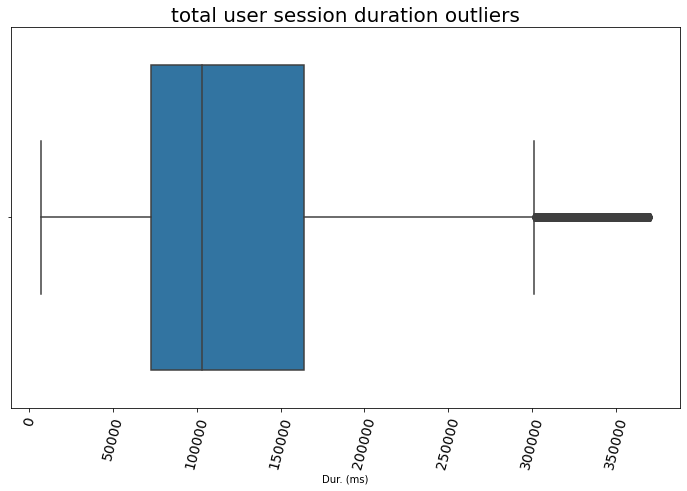

In [482]:
plot_box(df, "Dur. (ms)", "total user session duration outliers")

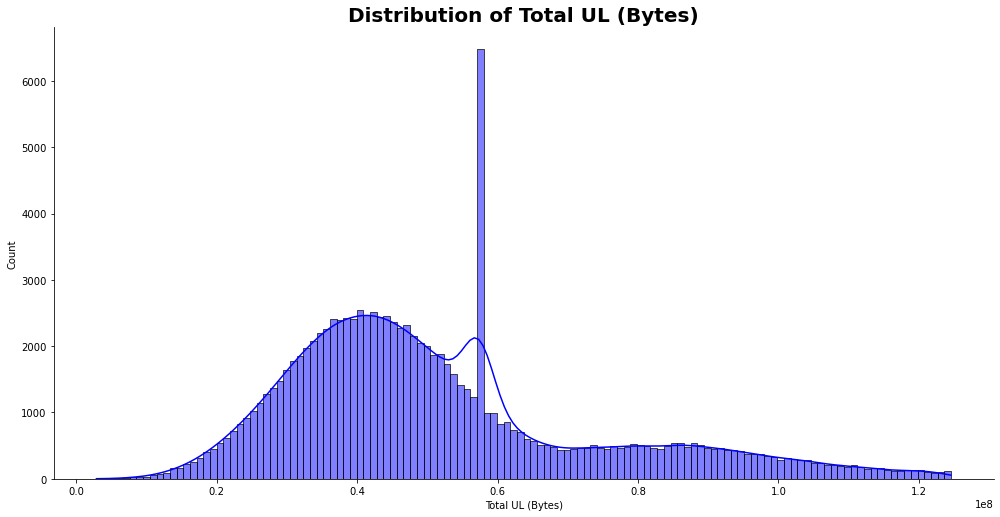

In [483]:
plot_hist(df, "Total UL (Bytes)", "blue")

In [488]:
# total data per app
df['Social Media'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
df['Google'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['Email'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
df['Youtube'] = df['Youtube DL (Bytes)'] + df['Youtube DL (Bytes)']
df['Netflix'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['Gaming'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
df['Other'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']

user_app_df = df[['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']]
user_app_df.head()

,Social Media,Google,Email,Youtube,Netflix,Gaming,Other
IMSI,,,,,,,
2.040471e+14,1546088.0,9218647.0,3330974.0,37960640.0,28846230.0,43070260.0,4.013605e+08
2.040808e+14,715224.0,10438660.0,1520771.0,19679778.0,26592300.0,178048738.0,4.705265e+08
2.082001e+14,3122781.0,1624662.0,3657501.0,11113126.0,31830562.0,9124516.0,5.159737e+08
2.082001e+14,2577104.0,13811478.0,3855734.0,44829428.0,27785852.0,344105897.0,3.096107e+08
2.082001e+14,3426716.0,11665887.0,5564462.0,8093194.0,57343415.0,917684766.0,1.079435e+09


(array([11561., 14245., 15021., 16045., 21971., 15113.,  4037.,  3314.,
         2858.,  2305.]),
 array([8.82708200e+06, 1.57594263e+08, 3.06361443e+08, 4.55128624e+08,
        6.03895804e+08, 7.52662985e+08, 9.01430166e+08, 1.05019735e+09,
        1.19896453e+09, 1.34773171e+09, 1.49649889e+09]),
 <BarContainer object of 10 artists>)

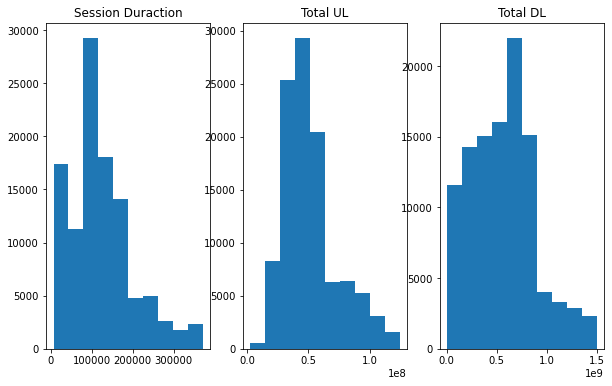

In [533]:
fig, ax = plt.subplots(1,3, figsize=(10, 6))
ax[0].set_title('Session Duraction')
ax[0].hist(df['Dur. (ms)'])

ax[1].set_title('Total UL')
ax[1].hist(df['Total UL (Bytes)'])

ax[2].set_title("Total DL")
ax[2].hist(df['Total DL (Bytes)'])
# ax[1].hist(df[])

(array([13238., 13958., 14676., 15284., 21088., 16236.,  3685.,  3233.,
         2794.,  2278.]),
 array([1.0600000e+02, 7.8043580e+06, 1.5608610e+07, 2.3412862e+07,
        3.1217114e+07, 3.9021366e+07, 4.6825618e+07, 5.4629870e+07,
        6.2434122e+07, 7.0238374e+07, 7.8042626e+07]),
 <BarContainer object of 10 artists>)

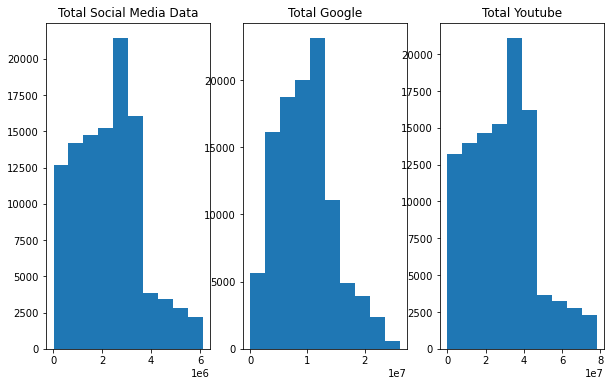

In [536]:
fig, ax = plt.subplots(1,3, figsize=(10, 6))
ax[0].set_title('Total Social Media Data')
ax[0].hist(user_app_df['Social Media'])

ax[1].set_title('Total Google')
ax[1].hist(user_app_df['Google'])

ax[2].set_title("Total Youtube")
ax[2].hist(user_app_df['Youtube'])

In [ ]:
# BiVariant

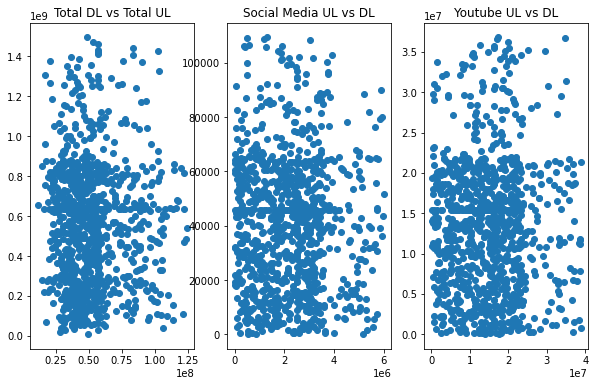

In [560]:
# def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
# plot_box_multi(df, df['Total UL (Bytes)'], df['Total DL (Bytes)'], 'Total UL to DL')
# plt.scatter(df['Total UL (Bytes)'].sample(1000),df['Total DL (Bytes)'].sample(1000))
# plt.xlabel("Total UL")
# plt.ylabel("Total DL")

fig, ax = plt.subplots(1,3, figsize=(10, 6))
ax[0].set_title("Total DL vs Total UL")
ax[0].scatter(df['Total UL (Bytes)'].sample(1000),df['Total DL (Bytes)'].sample(1000))

ax[1].set_title("Social Media UL vs DL")
ax[1].scatter(df['Social Media DL (Bytes)'].sample(1000), df['Social Media UL (Bytes)'].sample(1000))

ax[2].set_title("Youtube UL vs DL")
ax[2].scatter(df['Youtube DL (Bytes)'].sample(1000), df['Youtube UL (Bytes)'].sample(1000))


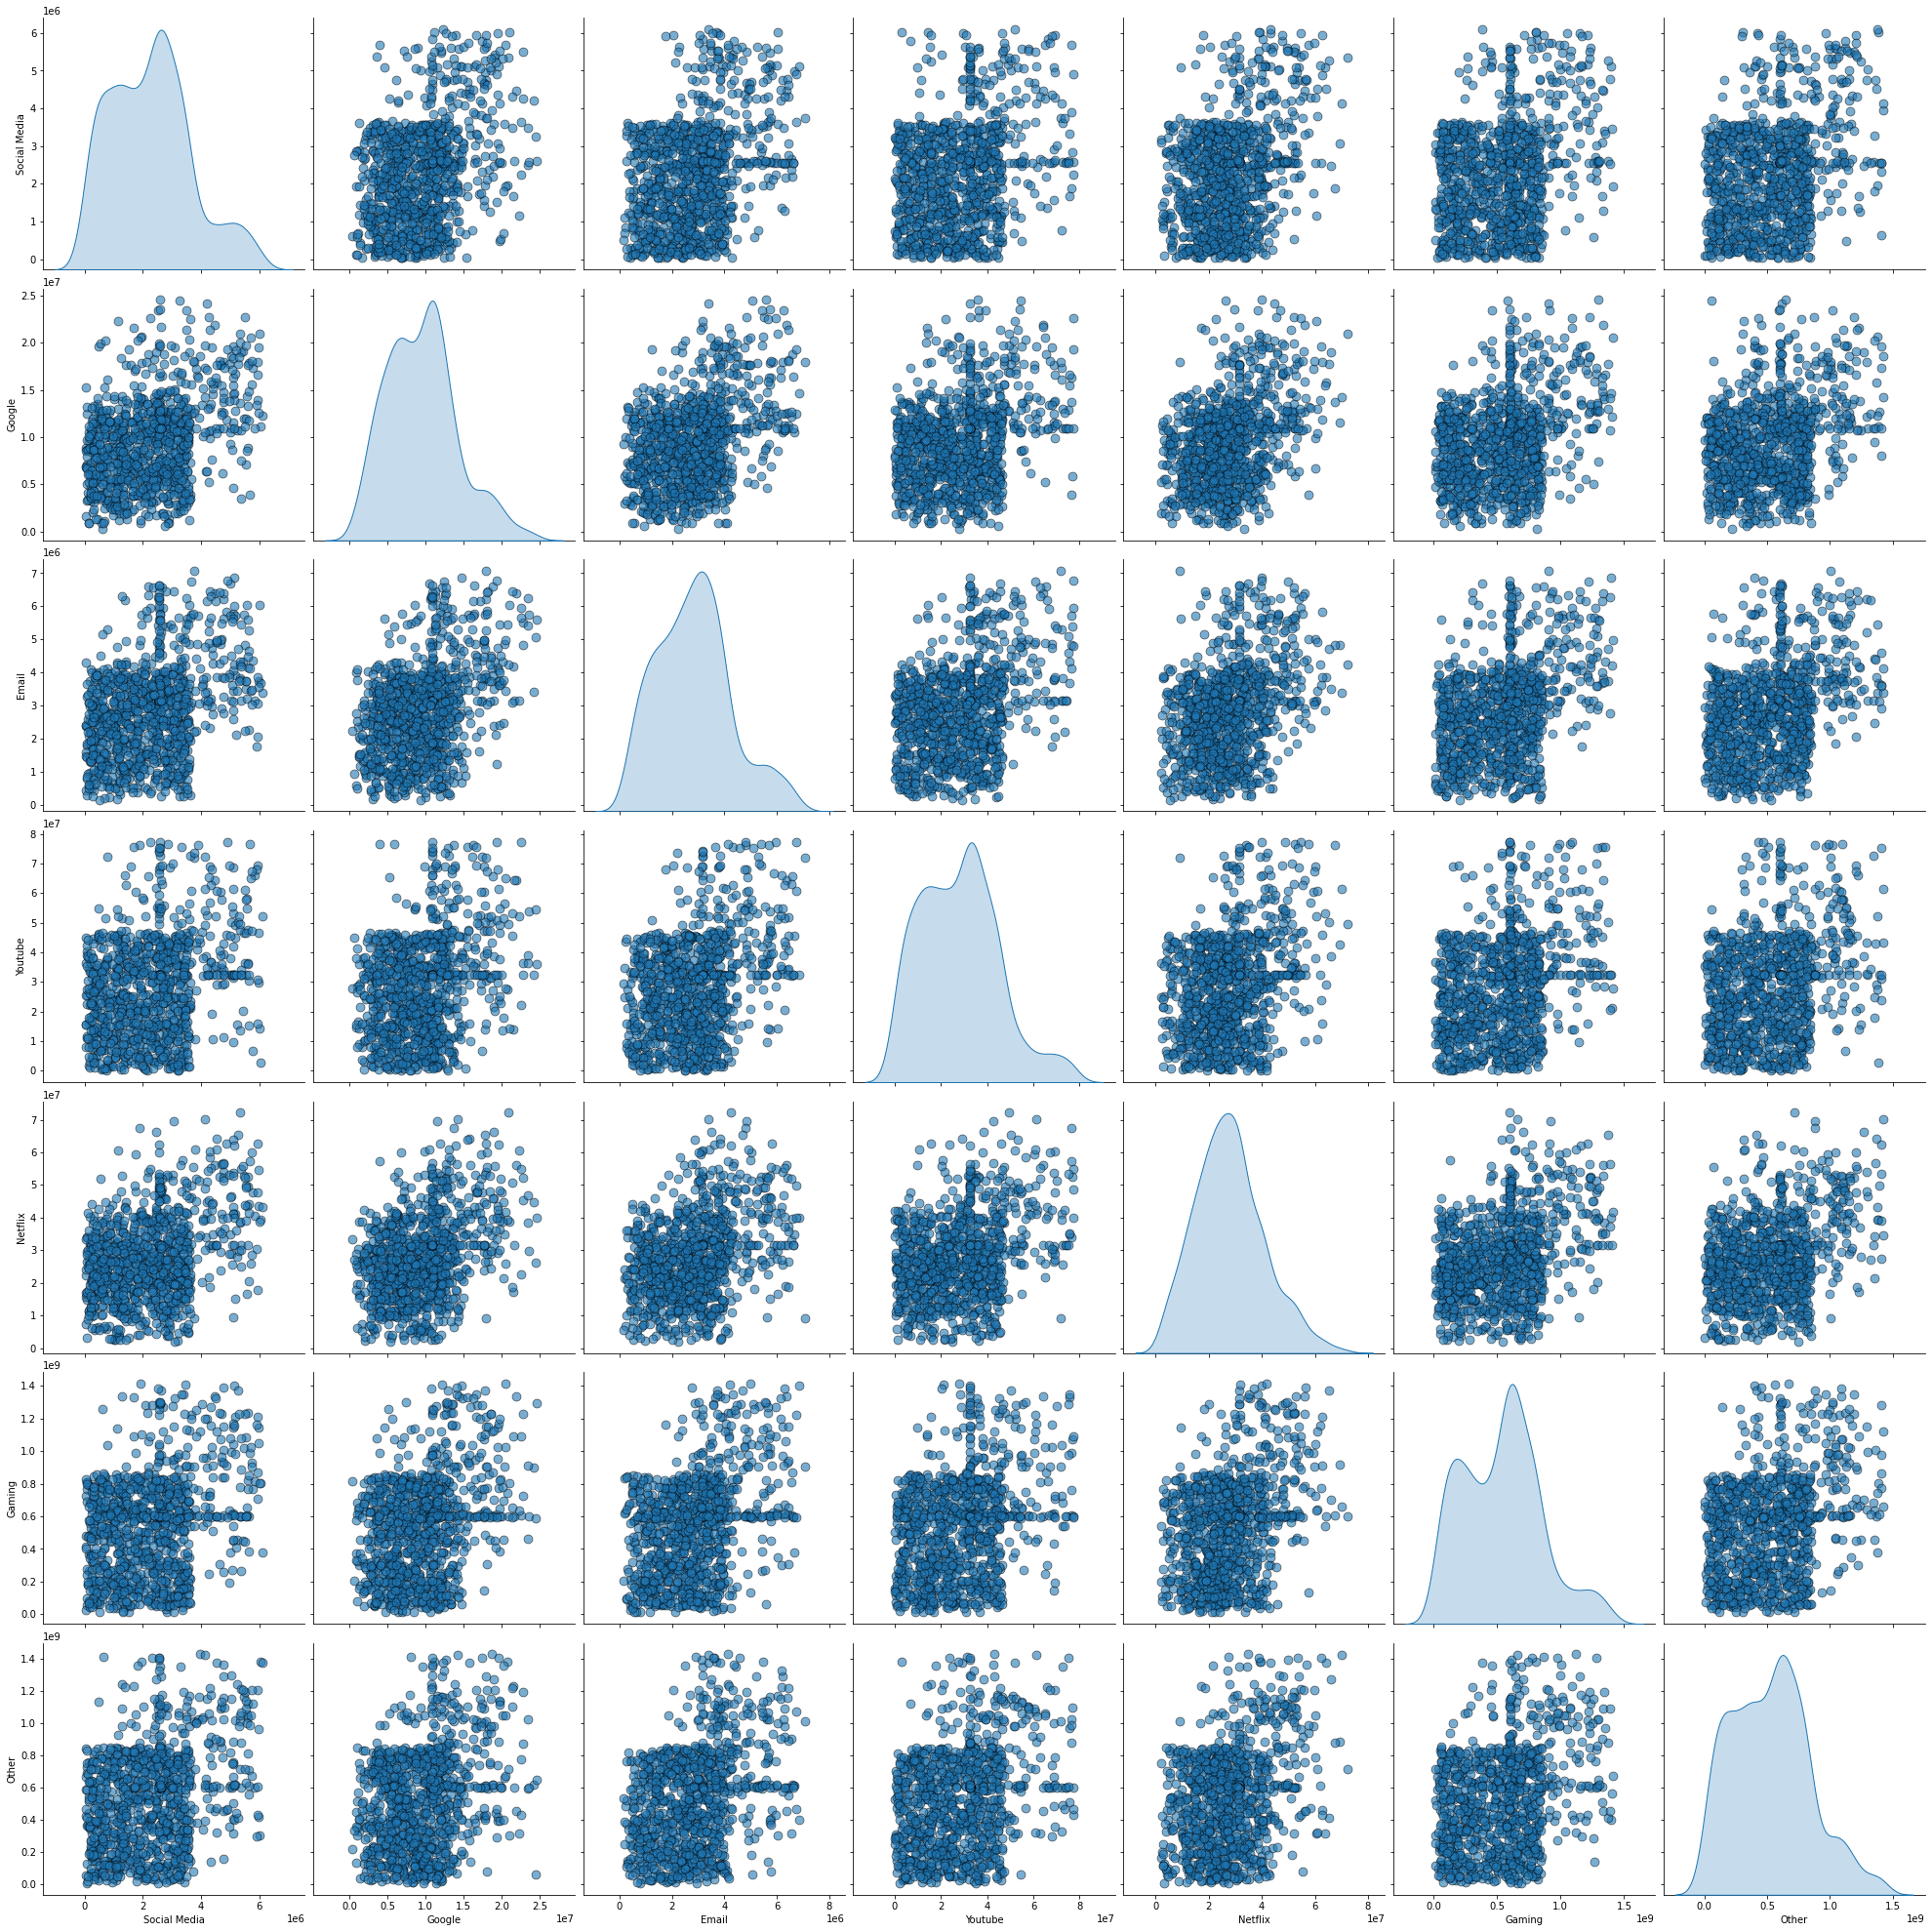

In [504]:
sns.pairplot(user_app_df.sample(1000), diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height=4)